# Task 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
# load data 
data = pd.read_csv('a3/task1data.csv')

In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
data.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

In [5]:
data.isnull().sum() # checking missing data

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

The label we want to predict is the field diagnosis, which is a two-category problem.

Except for the id and diagnosis fields, there are 30 fields, which are the average value, variance value and maximum value of some features, so there are 10 real features, and each feature has 3 dimensions of data.

In [6]:
# cleaning data
data = data.drop(columns= 'Unnamed: 32' )
data = data.drop(columns= 'id' )

In [7]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
data.columns.values.tolist()

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [9]:
# divide the data into three parts, namely mean, se and worst
features_mean,features_se,features_worst =[],[],[]
for feat in data.columns:
    if "mean" in feat:
        features_mean.append(feat)
    elif "se" in feat:
        features_se.append(feat)
    elif "worst" in feat:
        features_worst.append(feat)

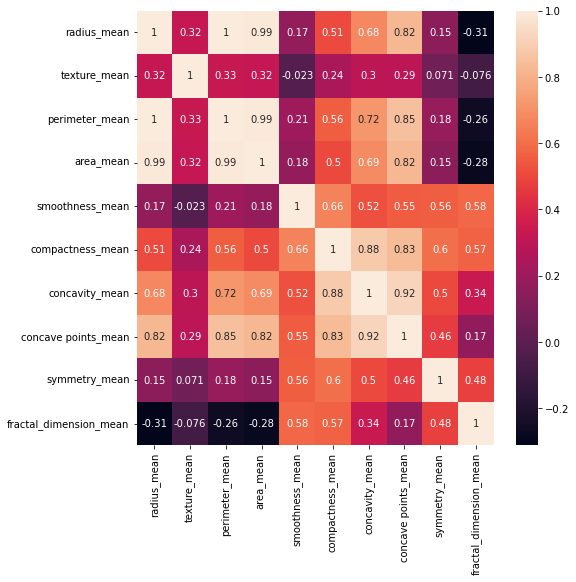

In [10]:
# use a heat map to observe the relationship between each feature
import seaborn as sns
mean_corr = data[features_mean].corr()
plt.figure(figsize=(8,8))
sns.heatmap(mean_corr,annot=True)
plt.show()


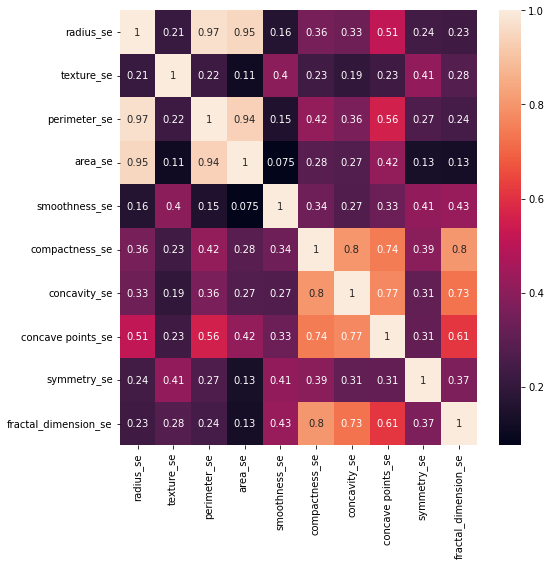

In [11]:
se_corr = data[features_se].corr()
plt.figure(figsize=(8,8))
sns.heatmap(se_corr,annot=True)
plt.show()


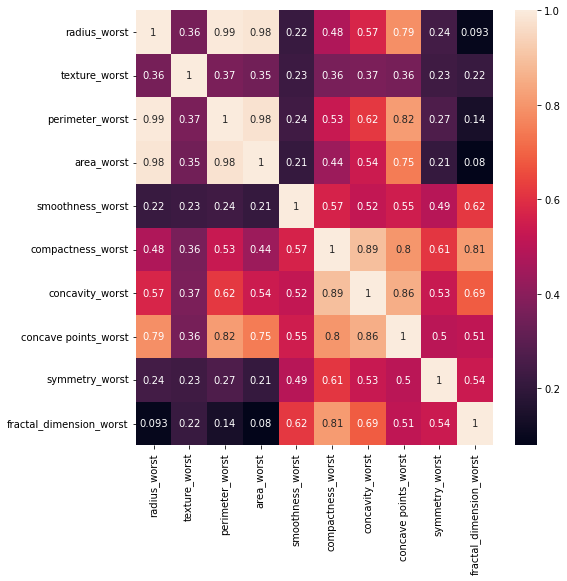

In [12]:
worst_corr = data[features_worst].corr()
plt.figure(figsize=(8,8))
sns.heatmap(worst_corr,annot=True)
plt.show()



## Choose features_mean 

We can clearly see that the correlation between radius_mean and perimeter_mean, area_mean is very large, and the correlation between compactness_mean and concave_points_mean, concavity_mean is also very high, so we can only take one of them as a representative.

In [13]:
# Because mean, se and worst are three different measurement methods for each feature, you can only take the mean class as a representative. And because of the above correlation analysis, one of the highly correlated features can be selected as a representative.
pick_feature_mean = ['radius_mean','texture_mean','smoothness_mean','compactness_mean','symmetry_mean','fractal_dimension_mean']
X = data[pick_feature_mean]

y = data['diagnosis']

In [14]:
# convert the label column (diagnosis) into the form of 0-1
y = np.where(y == 'M', 1, 0)

In [15]:
# use Z-score to normalize data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)


In [16]:
# split data to training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [18]:
# evaluate the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, mean_squared_error

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate precision, recall, F1-score, and support
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
print("Support:", support)
print("Mean Squared Error:", mse)


Accuracy: 0.9122807017543859
Confusion Matrix:
 [[62  5]
 [ 5 42]]
Precision: [0.92537313 0.89361702]
Recall: [0.92537313 0.89361702]
F1-score: [0.92537313 0.89361702]
Support: [67 47]
Mean Squared Error: 0.08771929824561403


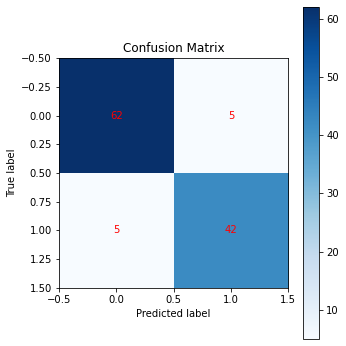

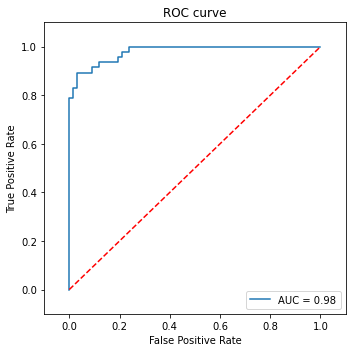

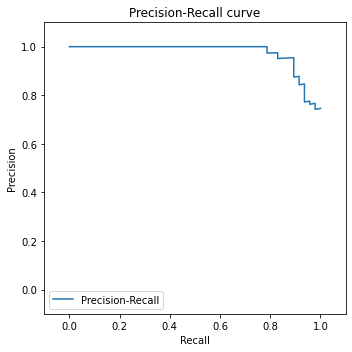

In [21]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve

# Get the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5,5))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Plot the ROC curve
y_pred_probs = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:,1])
roc_auc = roc_auc_score(y_test, y_pred_probs[:,1])

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve')
plt.tight_layout()
plt.show()

# Plot the Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probs[:,1])

plt.figure(figsize=(5,5))
plt.plot(recall, precision, label='Precision-Recall')
plt.legend(loc='lower left')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Precision-Recall curve')
plt.tight_layout()
plt.show()




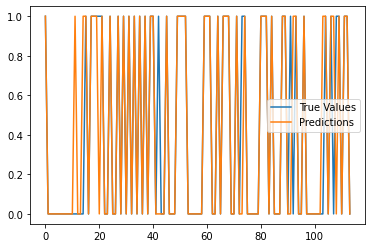

In [22]:
# Plot model performance
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predictions')
plt.legend()
plt.show()


In [23]:
# Output the predictions to a CSV file
predictions = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
predictions.to_csv("predictions_maen.csv", index=False)

## Choose features_se 

We can clearly see that the correlation between radius_se and perimeter_se, area_se is very large, and the correlation between compactness_se and concave_points_se, concavity_se is also very high, so we can only take one of them as a representative.

Accuracy: 0.8245614035087719
Confusion Matrix:
 [[59  8]
 [12 35]]
Precision: [0.83098592 0.81395349]
Recall: [0.88059701 0.74468085]
F1-score: [0.85507246 0.77777778]
Support: [67 47]
Mean Squared Error: 0.17543859649122806


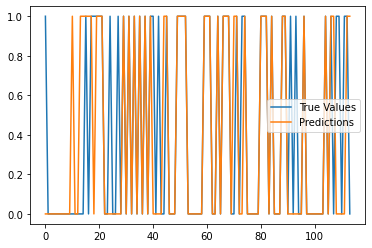

In [24]:
pick_feature_se = ['radius_se','texture_se','smoothness_se','compactness_se','symmetry_se','fractal_dimension_se']
X = data[pick_feature_se]

y = data['diagnosis']

# convert the label column (diagnosis) into the form of 0-1
y = np.where(y == 'M', 1, 0)

# use Z-score t normalize data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

# split data to training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# evaluate the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, mean_squared_error

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate precision, recall, F1-score, and support
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
print("Support:", support)
print("Mean Squared Error:", mse)

# Plot model performance
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predictions')
plt.legend()
plt.show()



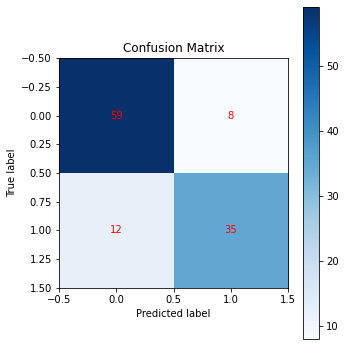

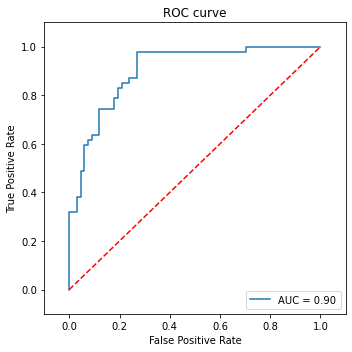

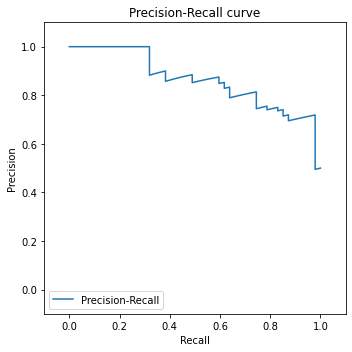

In [25]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve

# Get the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5,5))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Plot the ROC curve
y_pred_probs = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:,1])
roc_auc = roc_auc_score(y_test, y_pred_probs[:,1])

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve')
plt.tight_layout()
plt.show()

# Plot the Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probs[:,1])

plt.figure(figsize=(5,5))
plt.plot(recall, precision, label='Precision-Recall')
plt.legend(loc='lower left')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Precision-Recall curve')
plt.tight_layout()
plt.show()




In [26]:
# Output the predictions to a CSV file
predictions = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
predictions.to_csv("predictions_se.csv", index=False)

## Choose features_worst 

We can clearly see that the correlation between radius_worst and perimeter_worst, area_se is very large, and the correlation between compactness_worst and concave_points_worst, concavity_worst is also very high, so we can only take one of them as a representative.

Accuracy: 0.9736842105263158
Confusion Matrix:
 [[66  1]
 [ 2 45]]
Precision: [0.97058824 0.97826087]
Recall: [0.98507463 0.95744681]
F1-score: [0.97777778 0.96774194]
Support: [67 47]
Mean Squared Error: 0.02631578947368421


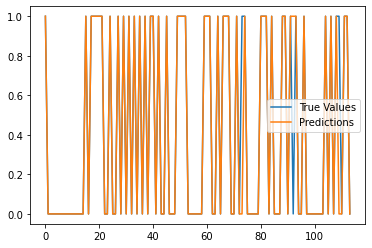

In [27]:
pick_feature_worst = ['radius_worst','texture_worst','smoothness_worst','compactness_worst','symmetry_worst','fractal_dimension_worst']
X = data[pick_feature_worst]

y = data['diagnosis']

# convert the label column (diagnosis) into the form of 0-1
y = np.where(y == 'M', 1, 0)

# use Z-score t normalize data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

# split data to training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# evaluate the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, mean_squared_error

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate precision, recall, F1-score, and support
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
print("Support:", support)
print("Mean Squared Error:", mse)

# Plot model performance
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predictions')
plt.legend()
plt.show()



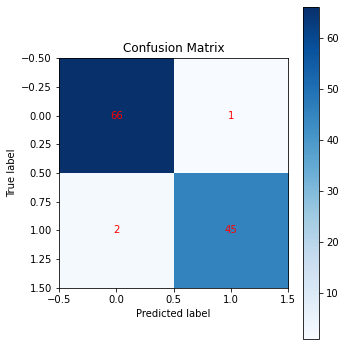

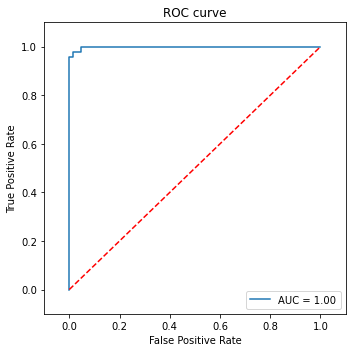

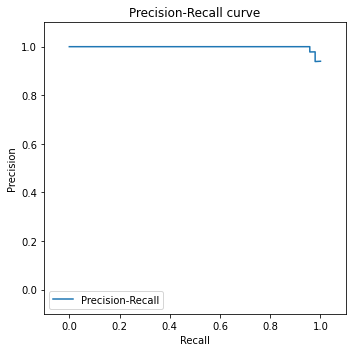

In [28]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve

# Get the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5,5))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Plot the ROC curve
y_pred_probs = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:,1])
roc_auc = roc_auc_score(y_test, y_pred_probs[:,1])

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve')
plt.tight_layout()
plt.show()

# Plot the Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probs[:,1])

plt.figure(figsize=(5,5))
plt.plot(recall, precision, label='Precision-Recall')
plt.legend(loc='lower left')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Precision-Recall curve')
plt.tight_layout()
plt.show()




In [29]:
# Output the predictions to a CSV file
predictions = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
predictions.to_csv("predictions_worst.csv", index=False)

Comparing three logic regression model, we can see that the third model(features_worst) is the best because its Accuracy is 0.97 and its ROC curve performs very well.